# DSI-Capstone: Forecasting Crytocurrency/Bitcoin prices

#### I am planning on using cryptocurrency price predictions to determine what will be the future prices of Bitcoin, Ethereum, and Monero based on the historical open and close prices of the cryptocurrencies from kaggle.
###### https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

## Main goals of the project:

1.The main goals of the project will be to determine what the future prices of Bitcoin will be in one year from now or two years from now using the Kaggle dataset as well as supplementing the data with current open and close prices to provide a better prediction as to what the prices will be months from now.

## Proposed Methods and Models:

#### There about 19 sets of data included for this project from Kaggle. 3 of those are data about Bitcoin. Specifically:
#### - Bitcoin Price: 
###### - Features: Date, Open, High, Low, Close, Volume, MarketCap
#### - Bitcoin Dataset:
###### - Features: total btc in circulation, btc block size, btc hash rate, btc cost per transaction, btc # of transactions, etc 
#### - Other Crypto Currency Cash Price (Monero, Ethereum, Bitcoin, etc)
###### - Features: Same features as 'Bitcoin Price' Dataset


## Models:

###### Since I'm trying to predict the price of these cryptocurrencies, I will be using a time series model. I plan on trying ARIMA and seasonal models. Outside of that I'm plan on using Pyflux and Prophet which are separate libraries desgined for time series modeling within python. I also plan on using existing open and close price data from Bitcoin, ethereum, and Monero sites from the past few months to see if my dataset can accurately predict those prices. So I would be using dataset from Kaggle as my training dataset and using supplemental data from the web as my test data. 

## Risks and Assumptions:

### For the bitcoin_cash_price dataset there are features such Volume and Market Cap that I assume would have good predictive power on the price of bitcoin values or other cryptocurrency values but they may not have any predictive power so I may have to drop them.
### There are features in the "bitcoin_dataset"  that need an understanding of domain knowledge so I will have to some research onto these features to understand what these mean in regards bitcoin price fluctuations and the context of it.

## Initial Goals & Success Criteria:

##### My success for this model will be determined by how accurate my predicitve model and/or it can predict the opening/closing price of currency on a past date.

In [1]:
# import modeling libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import datetime as datetime
import math, datetime

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
btc_cash_price = pd.read_csv('bitcoin_cash_price.csv')
btc_price = pd.read_csv('bitcoin_price.csv')
btc_ds = pd.read_csv('bitcoin_dataset.csv')

ethereum_classic_price = pd.read_csv('ethereum_classic_price.csv')
ethereum_dataset = pd.read_csv('ethereum_dataset.csv')
ethereum_price = pd.read_csv('ethereum_price.csv')


litecoin_price = pd.read_csv('litecoin_price.csv')
monero_price = pd.read_csv('monero_price.csv')

'''Intending to use these datasets in future iterations for analyses.'''
# iota_price = pd.read_csv('iota_price.csv')
# nem_price = pd.read_csv('nem_price.csv')
# bitconnect_price = pd.read_csv('bitconnect_price.csv')
# dash_price = pd.read_csv('dash_price.csv')
# neo_price = pd.read_csv('neo_price.csv')
# numeraire_price = pd.read_csv('numeraire_price.csv')
# omisego_price = pd.read_csv('omisego_price.csv')
# qtum_price = pd.read_csv('nem_price.csv')
# ripple_price = pd.read_csv('ripple_price.csv')
# stratis_price = pd.read_csv('stratis_price.csv')
# waves_price = pd.read_csv('waves_price.csv')

'Intending to use these datasets in future iterations for analyses.'

## Viewing the # of rows and columns for tables across cryptocurrencies

In [3]:
print('btc_cash_price:', btc_cash_price.shape)
print('btc_price:', btc_price.shape)
print('btc_ds:', btc_ds.shape)
print('\n')
print('ethereum_classic_price:', ethereum_classic_price.shape)
print('ethereum_dataset:', ethereum_dataset.shape)
print('ethereum_price:', ethereum_price.shape)
print('\n')
print('litecoin_price:', litecoin_price.shape)
print('monero_price:', monero_price.shape)

btc_cash_price: (108, 7)
btc_price: (1655, 7)
btc_ds: (2920, 24)


ethereum_classic_price: (472, 7)
ethereum_dataset: (832, 18)
ethereum_price: (824, 7)


litecoin_price: (1655, 7)
monero_price: (1266, 7)


In [4]:
btc_price.tail() # viewing the begging close price of BTC in 2013

,Date,Open,High,Low,Close,Volume,Market Cap
1650,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1651,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1652,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1653,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1654,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [5]:
btc_price.head() #Viewing most recent price of BTC price

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


## Taking a look at Ethereum Price

In [6]:
# Viewing feature data types
ethereum_price.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [7]:
ethereum_price.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",298.57,304.84,290.77,294.66,"540,766,000","28,533,300,000"
1,"Nov 06, 2017",296.43,305.42,293.72,298.89,"579,359,000","28,322,700,000"
2,"Nov 05, 2017",300.04,301.37,295.12,296.26,"337,658,000","28,661,500,000"
3,"Nov 04, 2017",305.48,305.48,295.80,300.47,"416,479,000","29,175,300,000"
4,"Nov 03, 2017",288.50,308.31,287.69,305.71,"646,340,000","27,547,400,000"


In [8]:
# Converting Ethereum 'Date' column pandas to_datetime object
ethereum_price['Date'] = pd.to_datetime(ethereum_price['Date'])

# Sorting the dataframe by earliest date to most recent
ethereum_price = ethereum_price.sort_values('Date')

# Setting the Date column as the index of dataframe
ethereum_price.set_index('Date', inplace=True)

In [9]:
# Viewing the changes made above
ethereum_price.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2015-08-07,2.830000,3.540000,2.520000,2.770000,"164,329",-
2015-08-08,2.790000,2.800000,0.714725,0.753325,"674,188","167,911,000"
2015-08-09,0.706136,0.879810,0.629191,0.701897,"532,170","42,637,600"
2015-08-10,0.713989,0.729854,0.636546,0.708448,"405,283","43,130,000"
2015-08-11,0.708087,1.130000,0.663235,1.070000,"1,463,100","42,796,500"


In [10]:
ethereum_price.tail()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-11-03,288.50,308.31,287.69,305.71,"646,340,000","27,547,400,000"
2017-11-04,305.48,305.48,295.80,300.47,"416,479,000","29,175,300,000"
2017-11-05,300.04,301.37,295.12,296.26,"337,658,000","28,661,500,000"
2017-11-06,296.43,305.42,293.72,298.89,"579,359,000","28,322,700,000"
2017-11-07,298.57,304.84,290.77,294.66,"540,766,000","28,533,300,000"


'Standard deviation is pretty bad towards the tail end of the plot. From the timeline we can see there is much volatility\nof the price starting from April 2017 onwards.'

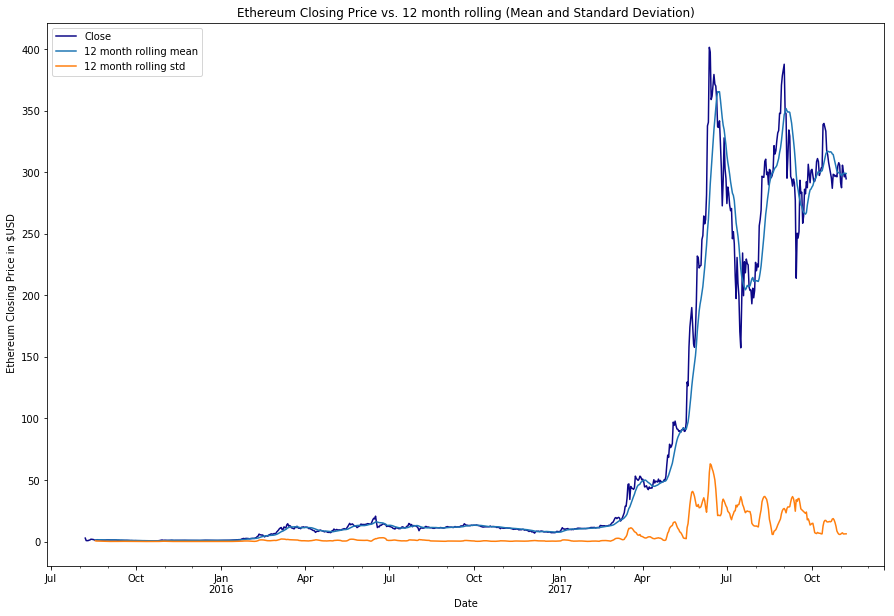

In [11]:
# Plotting the close price of ethereum starting from 08/07/2015
ethereum_price['Close']['2015-08-07':].plot(figsize=(15,10), colormap='plasma')

# Plotting the 12 month rolling mean of the Ethereum 'Close' price
ethereum_price['Close'].rolling(12).mean().plot(label='12 month rolling mean')

# plotting the 12 month rolling standard deviation of Ethereum 'Close' price
ethereum_price['Close'].rolling(12).std().plot(label='12 month rolling std')

# Creating the title and legends of the plot
plt.title('Ethereum Closing Price vs. 12 month rolling (Mean and Standard Deviation)')
plt.ylabel(' Ethereum Closing Price in $USD')
plt.legend()

'''Standard deviation is pretty bad towards the tail end of the plot. From the timeline we can see there is much volatility
of the price starting from April 2017 onwards.'''

In [12]:
# Importing Seasonality function from the Stats Model library
from statsmodels.tsa.seasonal import seasonal_decompose

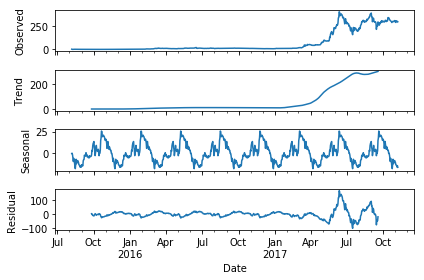

In [13]:
# Viewing the seasonal decomposition of the closing ethereum price in 100 frequency intervals
result_close_eth = seasonal_decompose(ethereum_price['Close'], freq=100)
result_close_eth.plot();

## Creating a Dicky-Fuller test function to test for stationary

In [14]:
# importing necessary test
from statsmodels.tsa.stattools import adfuller

# Creating function to pring out results of Dicky-Fuller test
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Stat', 'p-value', '# of lags', 'num of observations used']
    
    for value, label in zip(result,labels):
        print(label + ' : ' +str(value))
    
    if result[1] <= 0.05:
        print('strong evidence against null hypothesis')
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('weak eveidence against null hypothesis')
        print('fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')

Augmented Dicky-Fuller Test
ADF Test Stat : -1.18390279395
p-value : 0.68048171084
# of lags : 20
num of observations used : 803
weak eveidence against null hypothesis
fail to reject null hypothesis
Data has a unit root, it is non-stationary


'data is non-stationary so need to difference it'

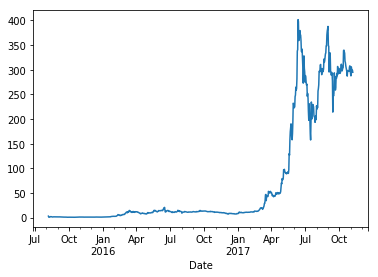

In [15]:
# Testing for stationary on Ethereum Close price
adf_check(ethereum_price['Close'])
ethereum_price['Close'].plot()
'''data is non-stationary so need to difference it'''

## Differencing the Close price data

Augmented Dicky-Fuller Test
ADF Test Stat : -4.44411964343
p-value : 0.000247780078754
# of lags : 19
num of observations used : 803
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


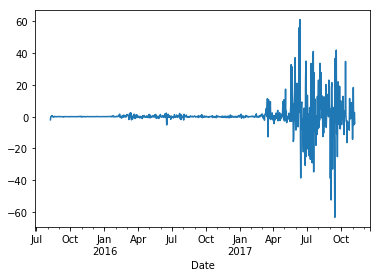

In [16]:
ethereum_price['First Diff'] = ethereum_price['Close'] - ethereum_price['Close'].shift(1)
# create a difference of one period to attempt to make the data stationary

# Checking if time series is stationary through Dickey-Fuller Test and dropping null values
adf_check(ethereum_price['First Diff'].dropna())

# data is stationary now, checking to see plot
ethereum_price['First Diff'].plot()

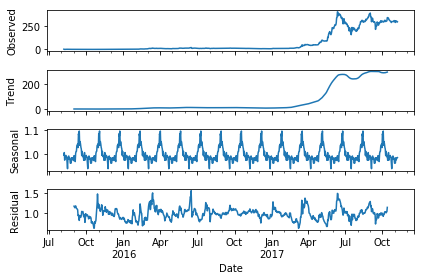

In [17]:
# Looking at seasonal decomposition of Ethereum Close price through a 'multiplicative' model instead of 'additive'
result_close = seasonal_decompose(ethereum_price['Close'], model='multiplicative', freq=50)
result_close.plot();

## Modelling Ethereum 'Close' price

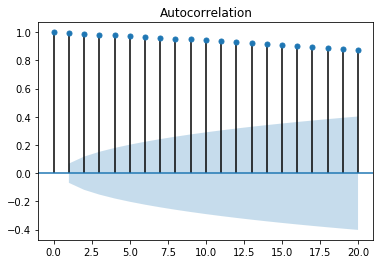

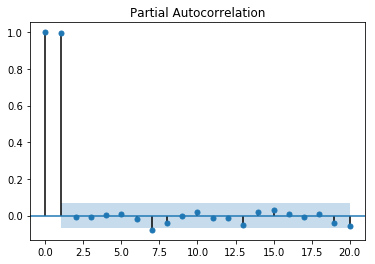

In [18]:
from statsmodels.tsa.arima_model import ARMA
# importing the libraries needed
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Viewing autocorrelation and partial-autocorrelation plots for closing price
plot_acf(ethereum_price['Close'].dropna(), lags=20);
plot_pacf(ethereum_price['Close'].dropna(), lags=20);

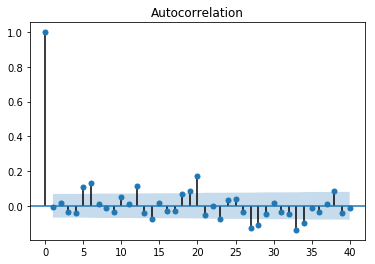

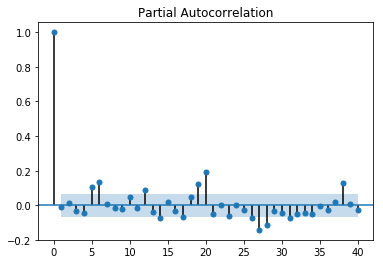

In [19]:
# Viewing the autocorrelation and partial-autocorrelation plots for the first differenced set of Close data
plot_acf(ethereum_price['First Diff'].dropna(), lags=40);
plot_pacf(ethereum_price['First Diff'].dropna(), lags=40);

In [20]:
# Instantiating the ARIMA model instance
arima_eth = ARIMA(ethereum_price['First Diff'].dropna(), order=(2,1,0), dates=ethereum_price.index).fit()

In [21]:
# Dropping any null values from the close price column and viewing rows
ethereum_price['Close'].dropna().shape

(824,)

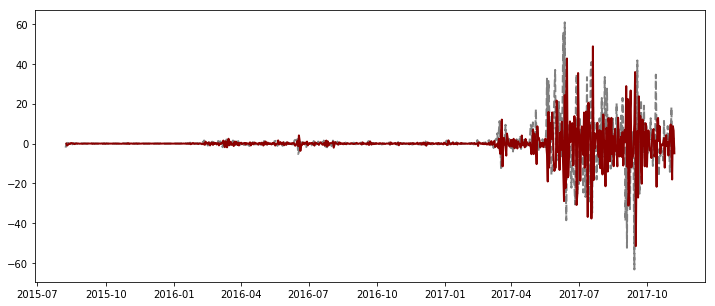

In [22]:
# Viewing the ARIMA model for the first differenced ethereum close prices against the ARIMA fitted values.
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(ethereum_price.index[1:], ethereum_price['First Diff'].dropna(), lw=2, color='grey', ls='dashed')
ax.plot(ethereum_price.index[2:], arima_eth.fittedvalues, lw=2, color='darkred')
plt.show()

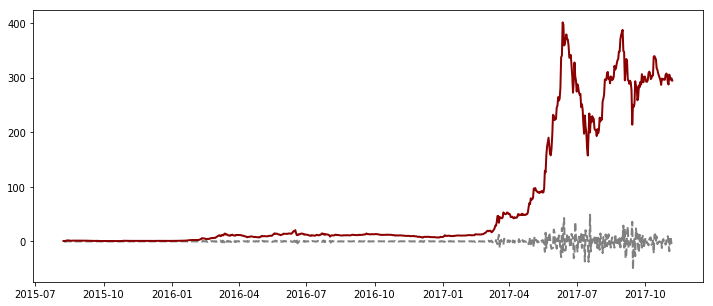

In [23]:
# Creating a forecast values column to predict close prices
ethereum_price['forecast'] = arima_eth.predict(start=1, end=822)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(ethereum_price.index[2:], ethereum_price['forecast'][2:], lw=2, color='grey', ls='dashed')
ax.plot(ethereum_price.index[1:], ethereum_price['Close'].dropna()[1:], lw=2, color='darkred')
plt.show()
# Plotting the close prices alongside the forecasted values differenced values. 

In [24]:
from sklearn.metrics import r2_score
r2_score(ethereum_price['First Diff'].dropna()[1:], arima_eth.predict(start=1, end=822))
# Imported the R2 score function to see model accuracy. We can see that this model has poor correlative power

-0.66572478522543577

## Taking a look at BTC Close price

In [25]:
print(btc_price.shape)# we want to look at doing a timeseries on the close price
btc_price.head()

(1655, 7)


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


## Setting datetime and indexing the date

In [26]:
btc_price['Date'] = pd.to_datetime(btc_price['Date'])
# converting the date column to datetime series

btc_price = btc_price.sort_values('Date')
# reversing the order of dates from oldest to most recent

# setting the date column to be the index
btc_price.set_index('Date',inplace = True)

In [27]:
btc_price.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [28]:
btc_price.isnull().sum() # no null or missing values

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [29]:
# removing all comma characters within the Volume values
btc_price['Volume'] = btc_price['Volume'].apply(lambda x: x.replace(',',''))

In [30]:
# creating a variable for the following columns
corr = btc_price[['Open', 'High', 'Low', 'Close']]

In [31]:
# Viewing correlation between all features
btc_price_corr = corr.corr()

btc_price_corr

,Open,High,Low,Close
Open,1.000000,0.999275,0.999117,0.998519
High,0.999275,1.000000,0.998927,0.999371
Low,0.999117,0.998927,1.000000,0.999288
Close,0.998519,0.999371,0.999288,1.000000


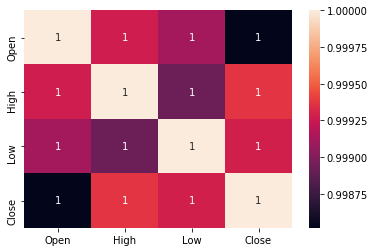

In [32]:
# Viewing Correlation plot
sns.heatmap(btc_price.corr(), annot=True)

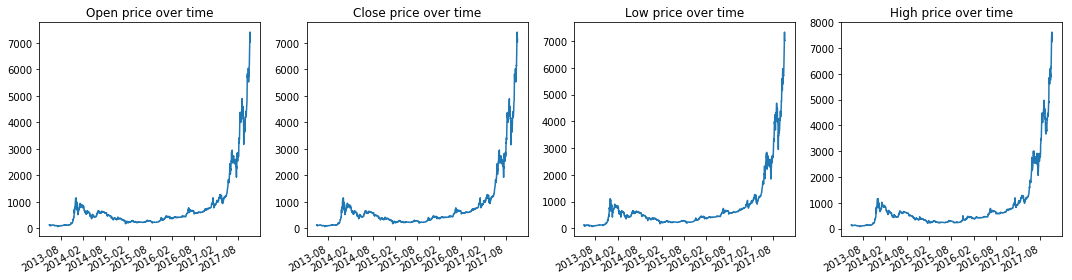

In [33]:
# Viewing seasonal decomposition of 'Open', 'Close', 'Low', and 'High' prices for BTC
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
from statsmodels.tsa.seasonal import seasonal_decompose


ax[0].plot(btc_price.index, btc_price['Open'])
ax[0].set_title('Open price over time')

ax[1].plot(btc_price.index, btc_price['Close'])
ax[1].set_title('Close price over time')

ax[2].plot(btc_price.index, btc_price['Low'])
ax[2].set_title('Low price over time')

ax[3].plot(btc_price.index, btc_price['High'])
ax[3].set_title('High price over time')
fig.autofmt_xdate()
plt.tight_layout()

In [34]:
# creating variables for each feature for analyses purposes
btc_price_close = btc_price[['Close']]
btc_price_open = btc_price[['Open']]
btc_price_low = btc_price[['Low']]
btc_price_high = btc_price[['High']]

In [35]:
btc_price_close.shape

(1655, 1)

In [36]:
# Removing all outliers in 'Close' column
# from scipy import stats
# btc_price_close = btc_price_close[(np.abs(stats.zscore(btc_price_close)) < 3).all(axis=1)]
# '''Tried removing the outliers to see if the smaller dataset would have better predictions 
# but made no effect when testing models with removed outliers'''

In [37]:
btc_price_close.shape

(1655, 1)

## Bitcoin 'Close' price trend

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0,0.5,'Price')

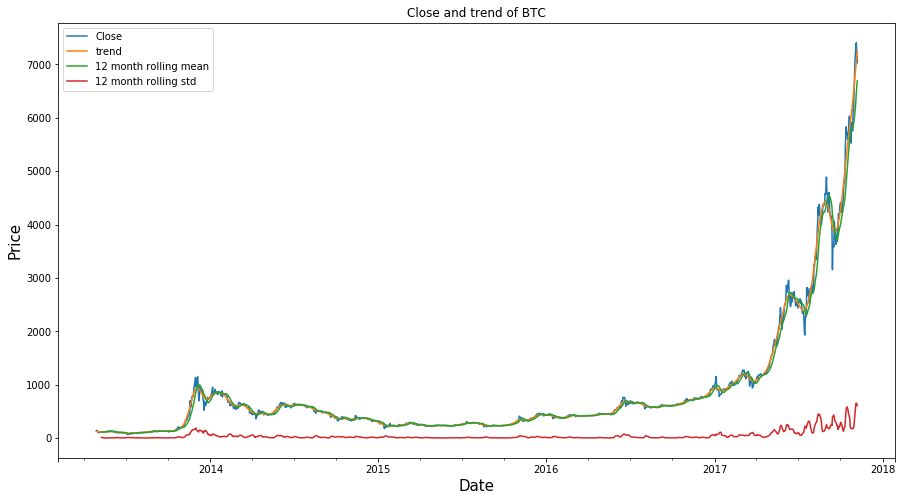

In [38]:
# Creating tuple for cycle and trend values
close_cycle, close_trend = sm.tsa.filters.hpfilter(btc_price_close['Close'])

#creating a column for trend
btc_price_close['trend'] = close_trend

# plotting close and trend values on plot from earliest start date
btc_price_close[['Close', 'trend']]['2013-04-28':].plot(title='Close and trend of BTC', figsize=(15,8));

# btc_price_close['Close']['2015-08-07':].plot(figsize=(15,10), 
#                                             colormap='plasma')
btc_price_close['Close'].rolling(12).mean().plot(label='12 month rolling mean')
btc_price_close['Close'].rolling(12).std().plot(label='12 month rolling std')
plt.legend()

plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)

In [39]:
btc_price_close.shape

(1655, 2)

## Bitcoin 'Open' Price and Trend

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


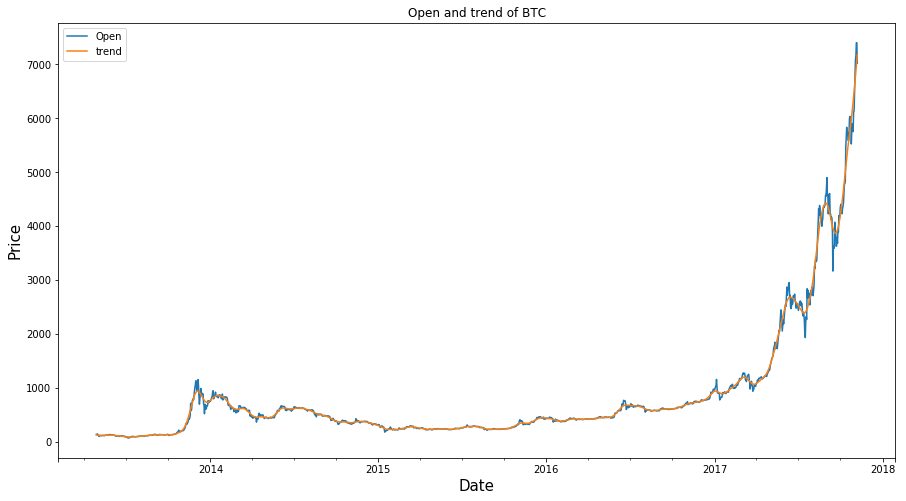

In [40]:
# Creating tuple for cycle and trend values
open_cycle, open_trend = sm.tsa.filters.hpfilter(btc_price_open['Open'])

#creating a column for trend
btc_price_open['trend'] = open_trend

# plotting close and trend values on plot from earliest start date
btc_price_open[['Open', 'trend']]['2013-04-28':].plot(title='Open and trend of BTC', figsize=(15,8));
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend()

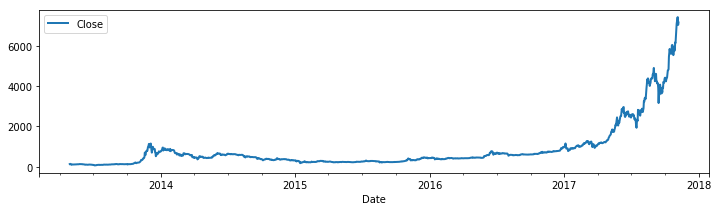

In [41]:
# Viewing Close price fluctuation over time
btc_price.plot.line(x=btc_price.index, y='Close', figsize=(12,3), lw=2)

Text(0,0.5,'Price in USD $')

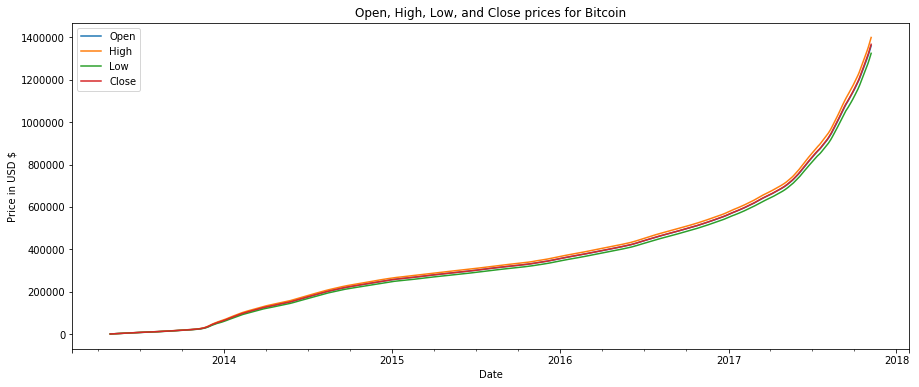

In [42]:
# Viewing cumulative sum of all features within dataframe over time
df_test = btc_price.cumsum()
plt.figure(figsize=(12,6)); 

ax = df_test.plot(kind='line', 
                           title='Open, High, Low, and Close prices for Bitcoin', figsize=(15,6));
ax.set_ylabel('Price in USD $',fontsize=10)

## viewing seasonal decomposition for Closing Price

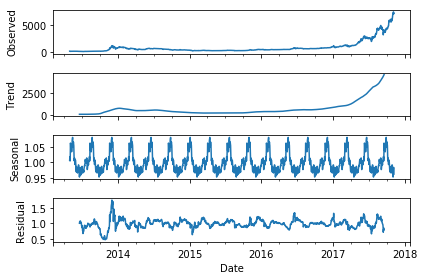

In [43]:
result_close = seasonal_decompose(btc_price_close['Close'], model='multiplicative', freq=100)
result_close.plot();

## viewing seasonal decomposition for Opening Price

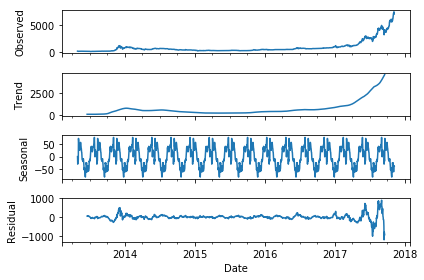

In [44]:
result_open = seasonal_decompose(btc_price_open['Open'], freq=100)
result_open.plot();

## viewing seasonal decomposition for High Price

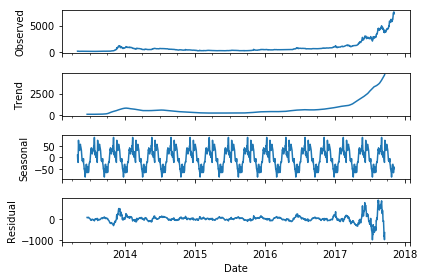

In [45]:
result_high = seasonal_decompose(btc_price_high['High'], freq=100)
result_high.plot();

# Viewing seasonal decomposition for Low Price

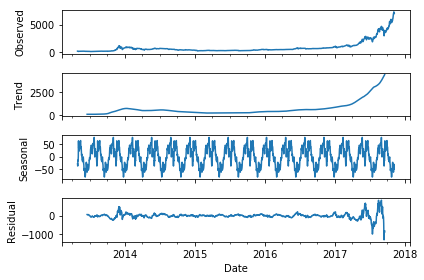

In [46]:
result_low = seasonal_decompose(btc_price_low, freq=100)
result_low.plot();

## Checking for Seasonality using Augmented Dicky-Fuller Test

In [47]:
# importing necessary test
from statsmodels.tsa.stattools import adfuller

# Creating function to pring out results of Dicky-Fuller test
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Stat', 'p-value', '# of lags', 'num of observations used']
    
    for value, label in zip(result,labels):
        print(label + ' : ' +str(value))
    
    if result[1] <= 0.05:
        print('strong evidence against null hypothesis')
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('weak eveidence against null hypothesis')
        print('fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')


Augmented Dicky-Fuller Test
ADF Test Stat : 3.84970431989
p-value : 1.0
# of lags : 24
num of observations used : 1630
weak eveidence against null hypothesis
fail to reject null hypothesis
Data has a unit root, it is non-stationary


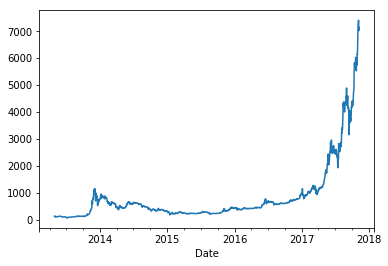

In [48]:
adf_check(btc_price_close['Close'])
btc_price_close['Close'].plot()
# data is non-stationary so need to difference it 

Augmented Dicky-Fuller Test
ADF Test Stat : -4.79094289773
p-value : 5.65976711222e-05
# of lags : 23
num of observations used : 1630
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


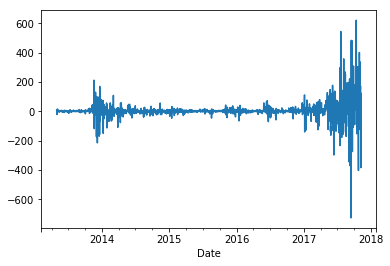

In [49]:
btc_price_close['First Diff'] = btc_price_close['Close'].diff(1)
# create a difference of one period

# Checking if time series is stationary through Dickey-Fuller Test and dropping null values
adf_check(btc_price_close['First Diff'].dropna())

# data is stationary now, checking to see plot
btc_price_close['First Diff'].plot()

In [50]:
# dong a second difference to see if seasonality changes
btc_price_close['Second Diff'] = btc_price_close['First Diff'] - btc_price_close['First Diff'].shift(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
btc_price_close.head()

,Close,trend,First Diff,Second Diff
Date,,,,
2013-04-28,134.21,122.933435,NaN,NaN
2013-04-29,144.54,122.047848,10.33,NaN
2013-04-30,139.00,121.169309,-5.54,-15.87
2013-05-01,116.99,120.318924,-22.01,-16.47
2013-05-02,105.21,119.528942,-11.78,10.23


Augmented Dicky-Fuller Test
ADF Test Stat : -14.390359477
p-value : 8.84579339246e-27
# of lags : 25
num of observations used : 1627
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


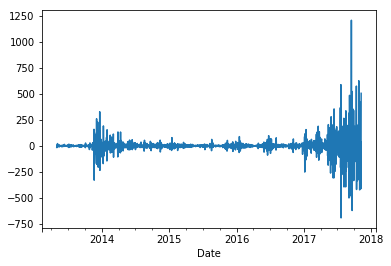

In [52]:
# Checking if time series is stationary through Dickey-Fuller Test and dropping null values
adf_check(btc_price_close['Second Diff'].dropna())

# data is stationary now, checking to see plot
btc_price_close['Second Diff'].plot()

In [53]:
btc_price_close['Seasonal Diff'] = btc_price_close['Close'].diff(30)

btc_price_close.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Close,trend,First Diff,Second Diff,Seasonal Diff
Date,,,,,
2013-04-28,134.21,122.933435,NaN,NaN,NaN
2013-04-29,144.54,122.047848,10.33,NaN,NaN
2013-04-30,139.00,121.169309,-5.54,-15.87,NaN
2013-05-01,116.99,120.318924,-22.01,-16.47,NaN
2013-05-02,105.21,119.528942,-11.78,10.23,NaN


Augmented Dicky-Fuller Test
ADF Test Stat : -7.72441815257
p-value : 1.16930823554e-11
# of lags : 25
num of observations used : 1599
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


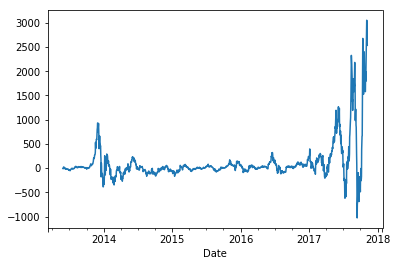

In [54]:
# Checking if time series is stationary through Dickey-Fuller Test and dropping null values
adf_check(btc_price_close['Seasonal Diff'].dropna())

# data is stationary now, checking to see plot
btc_price_close['Seasonal Diff'].plot()

## Plotting the Partial and Autocorrelation plots

In [55]:
# importing the libraries needed
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [56]:
btc_price_close.head()

,Close,trend,First Diff,Second Diff,Seasonal Diff
Date,,,,,
2013-04-28,134.21,122.933435,NaN,NaN,NaN
2013-04-29,144.54,122.047848,10.33,NaN,NaN
2013-04-30,139.00,121.169309,-5.54,-15.87,NaN
2013-05-01,116.99,120.318924,-22.01,-16.47,NaN
2013-05-02,105.21,119.528942,-11.78,10.23,NaN


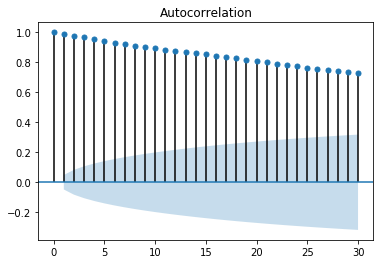

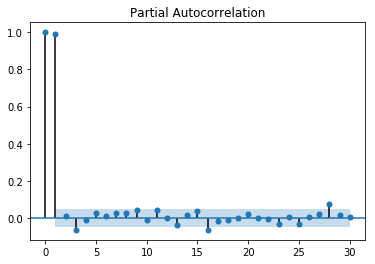

In [57]:
# Plotting for Close price
plot_acf(btc_price_close['Close'].dropna(), lags=30);
plot_pacf(btc_price_close['Close'].dropna(), lags=30);

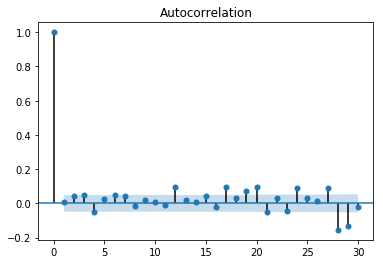

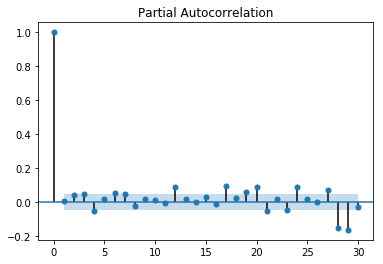

In [58]:
# Plotting for First Difference
plot_acf(btc_price_close['First Diff'].dropna(), lags=30);
plot_pacf(btc_price_close['First Diff'].dropna(), lags=30);

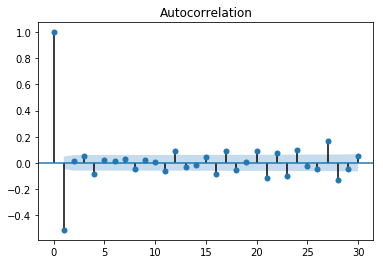

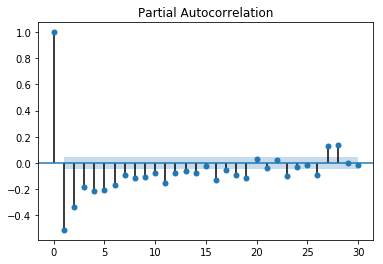

In [59]:
# Plotting for Second Difference
plot_acf(btc_price_close['Second Diff'].dropna(), lags=30);
plot_pacf(btc_price_close['Second Diff'].dropna(), lags=30);

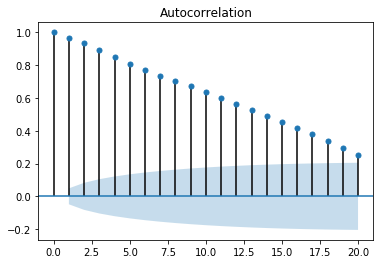

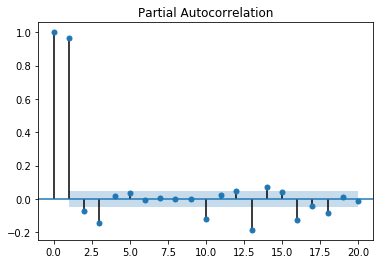

In [60]:
# Plotting for Seasonal Difference
plot_acf(btc_price_close['Seasonal Diff'].dropna(), lags=20);
plot_pacf(btc_price_close['Seasonal Diff'].dropna(), lags=20);
# since there is a sharp drop off after the first lag so we will be using an Autoregressive K number model. 
# If there was a gradual decline with our partial autocorrelation plot then we would use a moving average model.

In [61]:
# btc_close_diff = np.log10(btc_price_close['Close'])
# btc_close_diff.dropna(inplace=True)

# btc_close_diff = btc_close_diff.diff(periods=1)
# btc_close_diff.dropna(inplace=True)

# adf_check(btc_close_diff.dropna())

# btc_close_diff.plot(figsize=(12,6))

# plot_acf(btc_close_diff,lags=20);
# plot_pacf(btc_close_diff, lags=20);

## Modeling - Trying out an AR (Autoregressive) model
## In-sample predictions

In [62]:
from statsmodels.tsa.arima_model import ARMA

btc_price_close.head()

ar1 = ARMA(btc_price_close['First Diff'].dropna(), (2,1,0),dates=btc_price_close.index).fit()
# (Dummy code) ar2 = ARMA(btc_price_close['Seasonal Diff'].dropna(), (1,0),dates=btc_price_close.index).fit()
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             First Diff   No. Observations:                 1654
Model:                     ARMA(2, 1)   Log Likelihood               -9150.631
Method:                       css-mle   S.D. of innovations             61.139
Date:                Tue, 02 Jan 2018   AIC                          18311.262
Time:                        16:35:18   BIC                          18338.316
Sample:                    04-28-2013   HQIC                         18321.291
                         - 11-07-2017                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.1695     11.545      0.967      0.333     -11.458      33.797
ar.L1.First Diff     0.9836      0.025     39.544      0.000       0.935       1.032
ar.L2.First Diff     0.0151      0.025      0.608      0.543      -0.033       0.064
ma.L1.First Diff    -0.9878      0.005   -215.282      0.000      -0.997      -0.979
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           +0.0000j            1.0013            0.0000
AR.2          -66.2271           +0.0000j           66.2271            0.5000
MA.1            1.0124           +0.0000j            1.0124            0.0000
-----------------------------------------------------------------------------
"""

In [63]:
print(btc_price_close.index.shape)
print(btc_price_close['Close'].shape)
# print(ar2.fittedvalues.shape)
print(btc_price_close['Seasonal Diff'].shape)

(1655,)
(1655,)
(1655,)


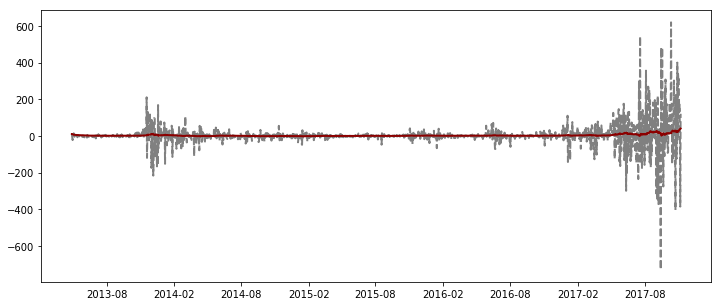

In [64]:
# date_ticks = btc_price_close.index.to_timestamp()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(btc_price_close.index[1:], btc_price_close['First Diff'].dropna(), lw=2, color='grey', ls='dashed')
ax.plot(btc_price_close.index[1:], ar1.fittedvalues, lw=2, color='darkred')
plt.show()

In [65]:
from sklearn.metrics import r2_score

r2_score(btc_price_close['First Diff'].dropna(), ar1.fittedvalues)
# really bad but better than before 

0.012568183476438954

## Out-of-sample Predictions

In [66]:
from statsmodels.tsa.arima_model import _arma_predict_out_of_sample

# instantiating variables based on AR model params
params= ar1.params
residuals= ar1.resid
p = ar1.k_ar
q = ar1.k_ma
k_exog = ar1.k_exog
k_trend = ar1.k_trend
steps = 365

oos_predictions = _arma_predict_out_of_sample(params, steps, residuals, p, q, k_trend, 
                                              k_exog, endog=btc_price_close['First Diff'].dropna(), exog=None, start=100)

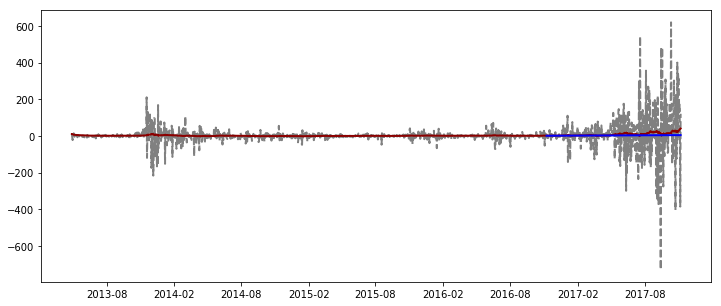

In [67]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(btc_price_close.index[1:], btc_price_close['First Diff'].dropna(), lw=2, color='grey', ls='dashed')
ax.plot(btc_price_close.index[1:], ar1.fittedvalues, lw=2, color='darkred')
ax.plot(btc_price_close.index[1290:], oos_predictions, lw=2, color='blue')
plt.show()
# the predictions don't match up well with AR model fitted values

## Trying out a MA (Moving Average) model

In [68]:
# Creating a Moving average model instance
ma1 = ARMA(btc_price_close['First Diff'].dropna(), (1,0,2)).fit()
# (TESTING) ma1 = ARMA(btc_price_close['First Diff'].dropna(), (1,1,2)).fit()

In [69]:
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             First Diff   No. Observations:                 1654
Model:                     ARMA(1, 0)   Log Likelihood               -9160.513
Method:                       css-mle   S.D. of innovations             61.526
Date:                Tue, 02 Jan 2018   AIC                          18327.026
Time:                        16:35:19   BIC                          18343.259
Sample:                    04-29-2013   HQIC                         18333.044
                         - 11-07-2017                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.2394      1.525      2.780      0.005       1.251       7.228
ar.L1.First Diff     0.0079      0.025      0.322      0.747      -0.040       0.056
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          126.1368           +0.0000j          126.1368            0.0000
-----------------------------------------------------------------------------
"""

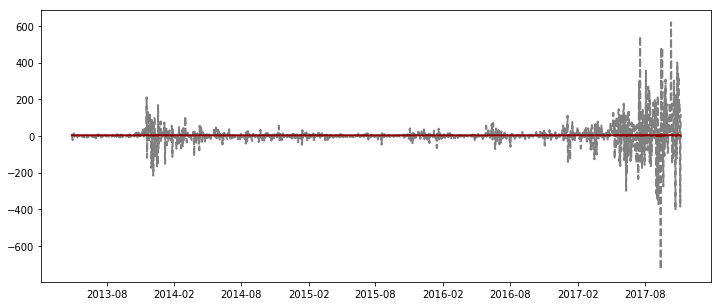

In [70]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(btc_price_close.index[1:], btc_price_close['First Diff'].dropna(), lw=2, color='grey', ls='dashed')
ax.plot(btc_price_close.index[1:], ma1.fittedvalues, lw=2, color='darkred')
plt.show()
# The moving average model fitted values don't match very well with the differenced close price data

In [71]:
r2_score(btc_price_close['First Diff'].dropna(), ma1.fittedvalues)
# score of the model isn't that much better

6.2787978905021191e-05

## ARIMA modeling

In [72]:
# modeling with ARIMA model
arima = ARIMA(btc_price_close['First Diff'].dropna(), order=(3,1,1), dates=btc_price_close.index).fit()

In [73]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.First Diff   No. Observations:                 1653
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -9145.037
Method:                       css-mle   S.D. of innovations             61.085
Date:                Tue, 02 Jan 2018   AIC                          18302.074
Time:                        16:35:20   BIC                          18334.536
Sample:                    04-29-2013   HQIC                         18314.108
                         - 11-07-2017                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0225      0.016      1.368      0.171      -0.010       0.055
ar.L1.D.First Diff    -0.0149      0.025     -0.598      0.550      -0.064       0.034
ar.L2.D.First Diff     0.0207      0.025      0.817      0.414      -0.029       0.070
ar.L3.D.First Diff     0.0248      0.025      0.980      0.327      -0.025       0.074
ma.L1.D.First Diff    -0.9904      0.004   -263.696      0.000      -0.998      -0.983
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.2268           -0.0000j            3.2268           -0.0000
AR.2           -2.0307           -2.8951j            3.5363           -0.3474
AR.3           -2.0307           +2.8951j            3.5363            0.3474
MA.1            1.0097           +0.0000j            1.0097            0.0000
-----------------------------------------------------------------------------
"""

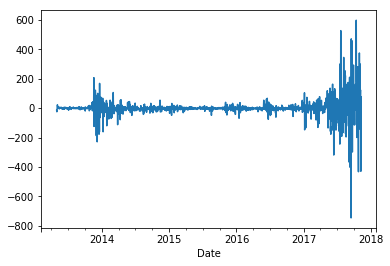

In [74]:
# Viewing the residual plots of the ARIMA model
arima.resid.plot()

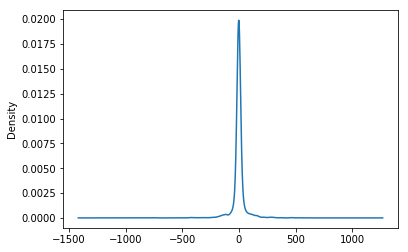

In [75]:
# Viewing kernel density plot of residuals
arima.resid.plot(kind='kde')

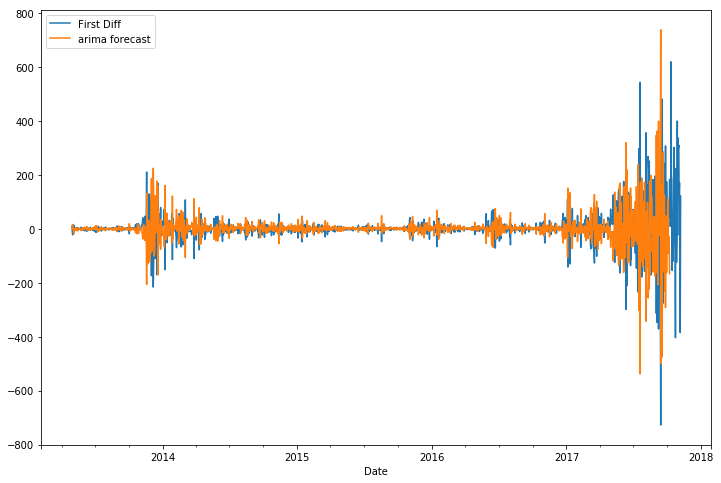

In [76]:
# creating new column for ARIMA forecast values and plotting the close price with forecast values
btc_price_close['arima forecast'] = arima.predict(start=1, end=1624)
btc_price_close[['First Diff', 'arima forecast']].plot(figsize=(12,8))
# Notes - started at 1, testing at 1495 to acccomodate for recent volatility
# Notes - now testing at 1344 for beginning of January 2017

# Plotting for forecasted differenced values against the Differenced close price

In [77]:
# Not much better than the previous model even though the plot looks alright.
r2_score(btc_price_close['First Diff'].dropna()[1:], arima.fittedvalues)

-0.99161224148863614

## Modeling with SARIMAX model

In [78]:
# Modeling with Seasonal ARIMA model (SARIMAX) using a seasonal difference instead of first order difference
smodel = SARIMAX(btc_price_close['Seasonal Diff'], order=(2,1,1), seasonal_order=(2,1,1,30)).fit()
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                      Seasonal Diff   No. Observations:                 1655
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 30)   Log Likelihood               -9280.213
Date:                            Tue, 02 Jan 2018   AIC                          18574.427
Time:                                    16:37:27   BIC                          18612.308
Sample:                                04-28-2013   HQIC                         18588.470
                                     - 11-07-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8976      0.225     -3.992      0.000      -1.338      -0.457
ar.L2          0.0131      0.013      1.040      0.298      -0.012       0.038
ma.L1          0.9155      0.226      4.053      0.000       0.473       1.358
ar.S.L30      -0.8318      0.017    -48.379      0.000      -0.866      -0.798
ar.S.L60      -0.3701      0.018    -20.860      0.000      -0.405      -0.335
ma.S.L30      -0.9998      1.295     -0.772      0.440      -3.538       1.538
sigma2      4424.3875   5705.611      0.775      0.438   -6758.405    1.56e+04
===================================================================================
Ljung-Box (Q):                      253.34   Jarque-Bera (JB):             41961.73
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.81   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

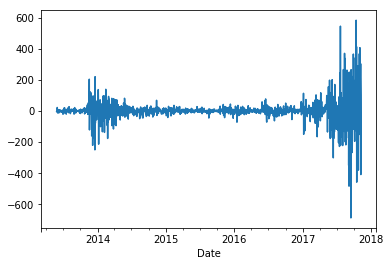

In [79]:
# Viewing SARIMAX residuals
smodel.resid.plot()

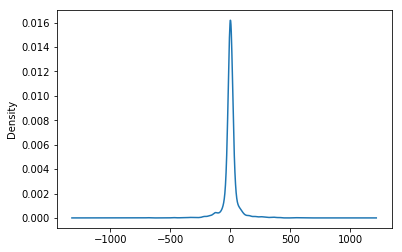

In [80]:
smodel.resid.plot(kind='kde')
# viewing kernel density plot of residuals

In [81]:
# Viewing the row number of Close price of BTC on 01/01/2017
btc_price_close.index.get_loc('2017-01-01')

1344

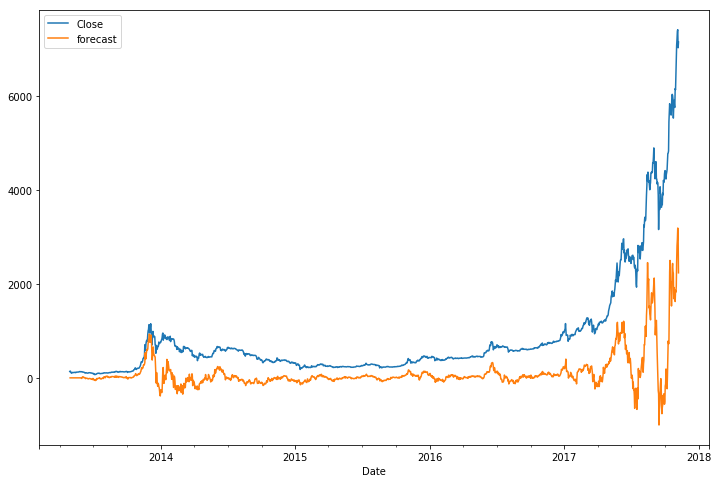

In [82]:
# creating forecast values of SARIMAX model
btc_price_close['forecast'] = smodel.predict(start=1, end=1655)
btc_price_close[['Close', 'forecast']].plot(figsize=(12,8))
# started at 1, testing at 1495 to acccomodate for recent volatility
# now testing at 1344 for beginning of January 2017

In [83]:
# Creating future dates on Dataframe to forecast
from pandas.tseries.offsets import DateOffset
future_dates = [btc_price_close.index[-1] + DateOffset(days=x) for x in range(1,360)]

future_btc = pd.DataFrame(columns=btc_price_close.columns, index=future_dates)

In [84]:
print(future_btc.shape)
print(btc_price_close.shape)

(359, 7)
(1655, 7)


In [85]:
# combining btc price close dataframe with future dates dataframe
final_btc = pd.concat([btc_price_close, future_btc])

In [86]:
final_btc.shape

(2014, 7)

In [87]:
final_btc['forecast'] = smodel.predict(start=1655, end=1860,dynamic=True)
# start was 1655


In [88]:
final_btc.tail()
# viewing empty values

,Close,trend,First Diff,Second Diff,Seasonal Diff,arima forecast,forecast
2018-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


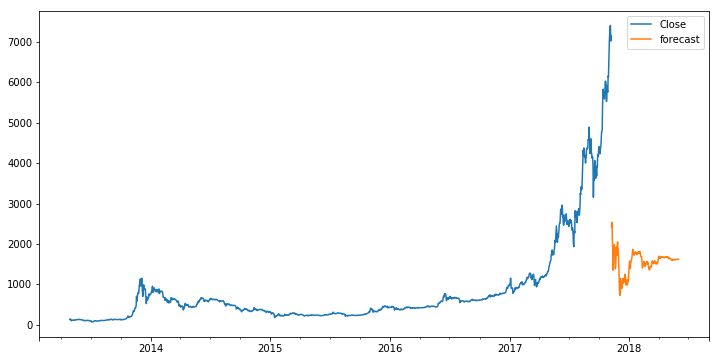

In [89]:
# Viewing forecast vs. Close plots
final_btc[['Close', 'forecast']].plot(figsize=(12,6))
# It look like there are forecast values but the predictions are way off as to what the current prices are at.

In [90]:
print(smodel.fittedvalues.shape)
print(btc_price_close['Seasonal Diff'].dropna().shape)

(1655,)
(1625,)


In [91]:
r2_score(btc_price_close['Seasonal Diff'].dropna(), smodel.fittedvalues[30:])
# it looks like the model was over fitted

0.97262383772933003

# plotting in Prophet 

In [92]:
# imorting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import datetime as datetime
import math, datetime
from fbprophet import Prophet
from datetime import datetime
from datetime import timedelta

In [93]:
# Reading dataframe only using 'Date' and 'Close' columns
btc_price = pd.read_csv('bitcoin_price.csv', usecols=['Date', 'Close'])

In [94]:
# renaming columns in dataframe
btc_price.columns = ['ds', 'y']

In [95]:
# Instantiating model in Prophet with btc_price dataframe
m = Prophet()
m.fit(btc_price)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [96]:
# making a dataframe for 365 days out and forecasting
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)


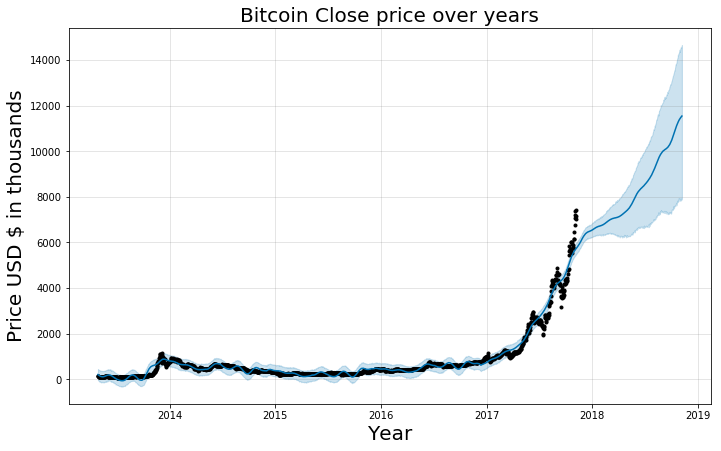

"As we can see this model is significantly better as we're using a generalized additive model\nhowever the uncertainty levels may need to be expanded due to the volatile nature of pricing"

In [97]:
# Plotting forecast values of Bitcoin for 2018
m.plot(forecast);
plt.title("Bitcoin Close price over years",fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Price USD $ in thousands",fontsize=20)
plt.show()
'''As we can see this model is significantly better as we're using a generalized additive model
however the uncertainty levels may need to be expanded due to the volatile nature of pricing'''

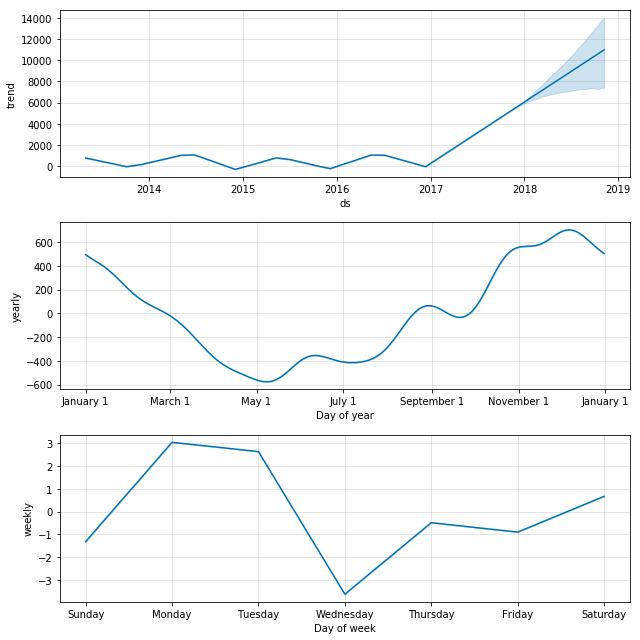

In [98]:
m.plot_components(forecast);
# trend shows that the price of bitcoin stayed steady for several years until 2016.
# the price of BTC trends are cleary visible. The forecast for the next year says that BTC is going to rise about $4000
# From the weekly forecast component, we tend to see that BTC Close price tends to be high at the beginning of the week and 
# dips down by mid-week

## Tweaking model fit more recent time period

In [99]:
btc_price['ds'] = pd.to_datetime(btc_price['ds']) # setting date column as datetime object

recent = btc_price.loc[btc_price['ds'] >= '2017-01-01'].sort_values('ds', axis=0) 
# locating all close price values after 01/01/2017

In [100]:
# Fitting a new model based on close pices after 01/01/2017
model_recent = Prophet(interval_width=0.95)
model_recent.fit(recent)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [101]:
# Creating predictions for 300 days out
future_recent = model_recent.make_future_dataframe(periods=300, freq='D')
forecast_recent = model_recent.predict(future_recent)

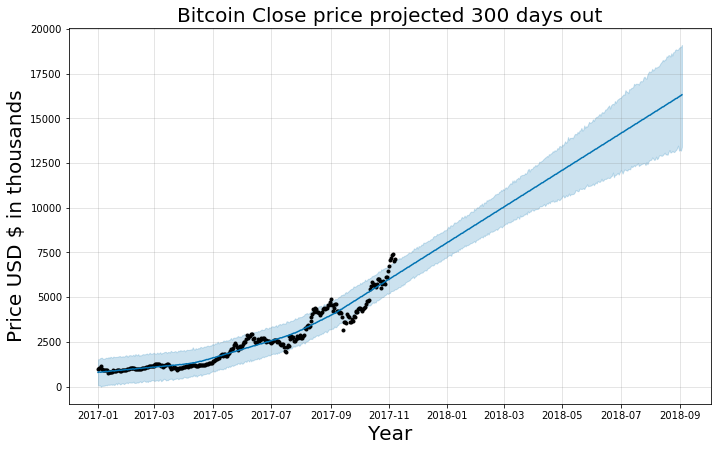

In [102]:
model_recent.plot(forecast_recent);
plt.title("Bitcoin Close price projected 300 days out",fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Price USD $ in thousands",fontsize=20)
plt.show()
# Viewing this plot we can see bitcoin closing price projections to be more in line with where the price is at today.
# The model is still a quite ways as it doesn't account for the spikes in more recent time intervals

In [103]:
import datetime
forecast_recent[forecast_recent.ds > datetime.datetime.now()].tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
606,2018-08-30,16169.449268,13369.934917,18735.995329,13469.773443,18844.403315,1.132654,1.132654,1.132654,1.132654,1.132654,1.132654,1.132654,1.132654,1.132654,16170.581923
607,2018-08-31,16203.116563,13388.622270,18780.573085,13188.246755,18932.545539,-2.625442,-2.625442,-2.625442,-2.625442,-2.625442,-2.625442,-2.625442,-2.625442,-2.625442,16200.491121
608,2018-09-01,16236.783858,13408.849851,18820.849089,13247.036643,18972.813788,3.722874,3.722874,3.722874,3.722874,3.722874,3.722874,3.722874,3.722874,3.722874,16240.506731
609,2018-09-02,16270.451152,13429.078273,18861.125092,13188.302893,18979.051960,-1.300276,-1.300276,-1.300276,-1.300276,-1.300276,-1.300276,-1.300276,-1.300276,-1.300276,16269.150876
610,2018-09-03,16304.118447,13449.359640,18902.011590,13404.548137,19095.763115,9.641999,9.641999,9.641999,9.641999,9.641999,9.641999,9.641999,9.641999,9.641999,16313.760446


In [105]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_recent, horizon='30 days')

In [106]:
df_cv.tail()
# from looking at the yhat and y columns we can see there is about over $2,000 difference

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
385,2017-11-03,5020.149166,4427.563409,5694.815332,7207.76,2017-10-08
386,2017-11-04,5043.302409,4400.060259,5679.515794,7379.95,2017-10-08
387,2017-11-05,5056.450143,4450.517367,5719.810071,7407.41,2017-10-08
388,2017-11-06,5098.832361,4464.995721,5771.040995,7022.76,2017-10-08
389,2017-11-07,5120.195204,4486.285642,5768.125779,7144.38,2017-10-08


# Using Pyflux

In [108]:
import pyflux as pf
# btc_price['ds'] = pd.to_datetime(btc_price['ds'])
# btc_price.set_index('ds',inplace = True)

In [109]:
btc_price = btc_price.reindex(index=btc_price.index[::-1])
yt_values = pd.DataFrame(np.diff(np.log(btc_price['y'].dropna())))
yt_values.index = btc_price.index[1:]

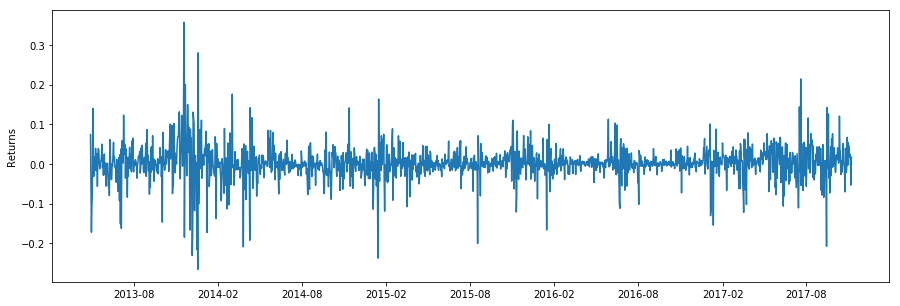

In [110]:
plt.figure(figsize=(15,5))
plt.ylabel('Returns')
plt.plot(yt_values)
plt.show()

In [111]:
my_model = pf.GARCH(p=1,q=1, data=yt_values)
print(my_model.latent_variables)

my_model.adjust_prior(1, pf.TruncatedNormal(0.01, 0.5, lower=0.0, upper=1.0))
my_model.adjust_prior(2, pf.TruncatedNormal(0.97, 0.5, lower=0.0, upper=1.0))

Index    Latent Variable           Prior           Prior Hyperparameters     V.I. Dist  Transform 
======== ========================= =============== ========================= ========== ==========
0        Vol Constant              Normal          mu0: 0, sigma0: 3         Normal     exp       
1        q(1)                      Normal          mu0: 0, sigma0: 0.5       Normal     logit     
2        p(1)                      Normal          mu0: 0, sigma0: 0.5       Normal     logit     
3        Returns Constant          Normal          mu0: 0, sigma0: 3         Normal     None      


In [112]:
my_model.fit('M-H', nsims=20000)

Acceptance rate of Metropolis-Hastings is 0.000225
Acceptance rate of Metropolis-Hastings is 0.00125
Acceptance rate of Metropolis-Hastings is 0.05405
Acceptance rate of Metropolis-Hastings is 0.1863
Acceptance rate of Metropolis-Hastings is 0.239375

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.2331375
Acceptance rate of Metropolis-Hastings is 0.32645


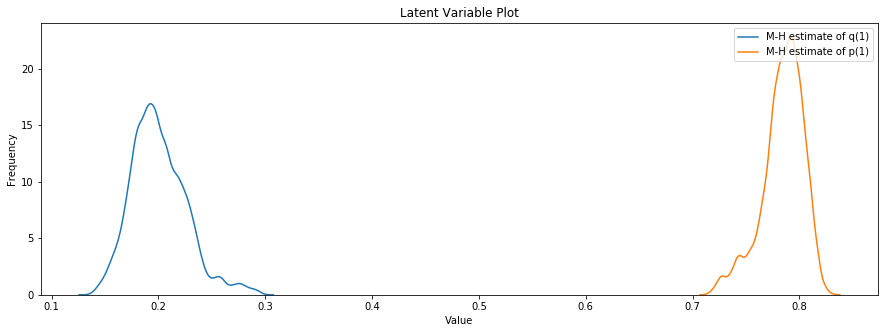

In [113]:
my_model.plot_z([1,2])

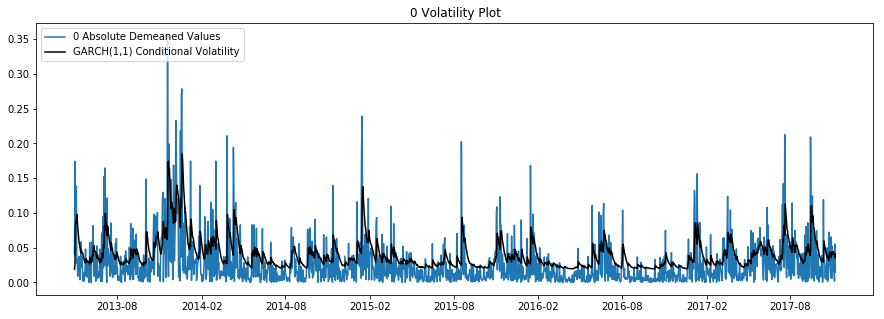

In [114]:
my_model.plot_fit(figsize=(15,5))

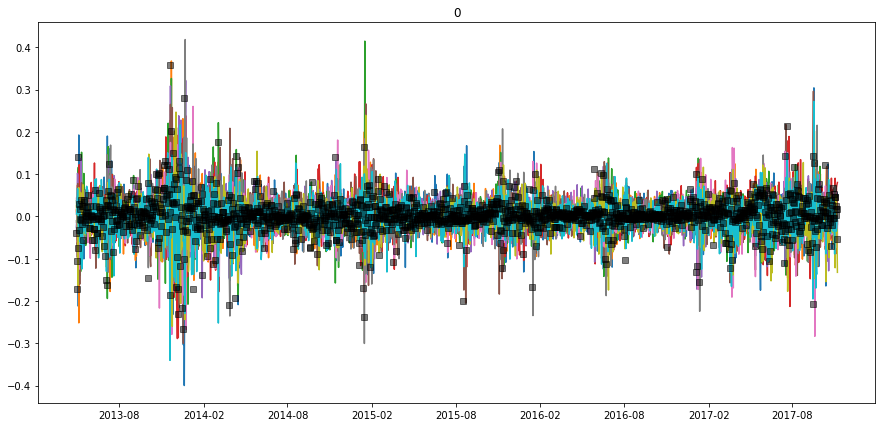

In [115]:
my_model.plot_sample(nsims=10, figsize=(15,7))